# Abstract
This project investigates basic implementations of trading strategies using moving averages of stocks. Specifically, I will focus on swing trading, including its basic and Moving Average Convergence Divergence (MACD) variation. The model will compare a predetermined fast moving average with a predetermined slow moving average and long/short stocks based on whether they cross. Later, I will also incorporate a technical indicator. In this paper, I will implement this strategy on SPY and back-test on data from 1992 to 2025 (obtained from Yahoo Finance). 

# Introduction
Swing trading is a speculative trading strategy where positions are held longer than day trading strategies but shorter than buy-and-hold strategies. In this strategy, analyst observe momentum signals to determine their long/short strategy. According to Forbes, "markets rarely move in straight lines—instead, they oscillate between periods of upward momentum (upswings) and downward pressure (downswings), even within broader trends." Swing traders attempt to enter positions at the beginning of these swings and exit near completion, regardless of whether the broader market is trending upward, downward or moving sideways.

### Section 1: Retrieving Data
In this section, I will retrieve pricing data for SPY using Yahoo Finance's Library

In [67]:
# Importing packages and libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY Close Price Vs. Moving Average')

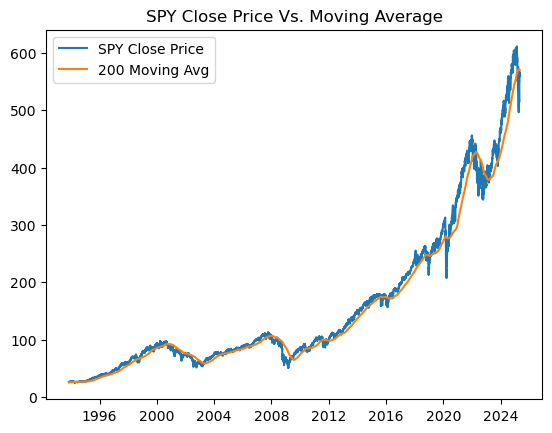

In [69]:
df = yf.download("SPY")
TICKER = 'SPY'
WINDOW = 200

# Calculate a moving avergae for SPY using the given window
df['Moving Avg'] = df['Close'].rolling(WINDOW).mean()
df = df.dropna()

# Plot the result in comparison with the actual prices
plt.plot(df['Close'])
plt.plot(df['Moving Avg'])
plt.legend([f'{TICKER} Close Price', f'{WINDOW} Moving Avg'])
plt.title(f'{TICKER} Close Price Vs. Moving Average')

### Section 2: Implementing a Basic Trading Strategy 
In this section, we will be creating a basic trading strategy that follows the moving average of SPY's closing price. 

When the closing price reaches above the moving average, we will long SPY. When the closing price reaches below the moving average, we will short SPY.

In [72]:
df.columns = df.columns.get_level_values(0)

def add_ma_strategy(df):
    df['Basic Strategy'] = np.where(df['Close'] > df['Moving Avg'], 1, -1)

    return df

df = add_ma_strategy(df)

# Take the cumulative returns of the S&P 500 and the cumulative returns of our strategy to see if it works
df['Asset Cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
df['Basic Strategy Cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Basic Strategy']) - 1

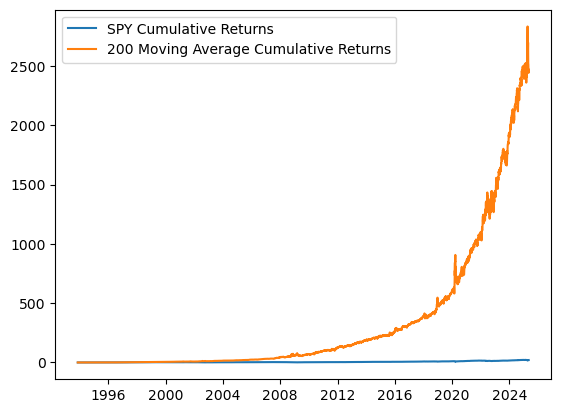

In [74]:
# Let's plot our results
plt.plot(df['Asset Cumulative'])
plt.plot(df['Basic Strategy Cumulative'])
plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])

While this looks very good, the data needs to be shifted by 1 day. This is because you don't actually know that there is going to be a crossover in the upcoming day. It is impossible to take a trade the day before the signal shows up. 

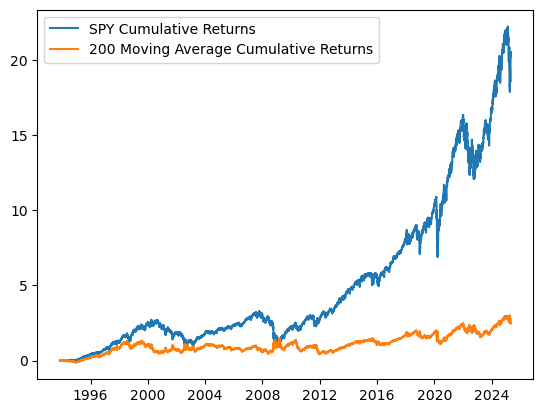

In [77]:
df['Basic Strategy Cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Basic Strategy'].shift(1)) - 1
plt.plot(df['Asset Cumulative'])
plt.plot(df['Basic Strategy Cumulative'])
plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])

Now, we can see that our basic strategy is very inefficient. 

### Section 3: Introducing a Swing Trading Strategy
Now, let's try to implement an elementary swing trading algorithm, we will track a "fast" and a "slow" moving average and identify upwards and downwards trends by observing how they cross over. Conceptually, when the fast moving average crosses the slow moving average, we will have a downward trend. We can create the following strategy based on this assumption:
* Fast moving average above slow -> Long
* Fast moving average below slow -> Short

While a traditional swing trading strategy utilizes three different moving averages of closing prices (Alexander Elder's Strategy), we will use two for simplicity.

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,100_ma,200_ma,12_ma,26_ma,Strategy,Strategy_12-26,Asset_Returns,Strategy_Returns,Strategy_12-26_Returns
Date,,,,,,,,,,,,,,
2022-02-28,416.613617,418.111651,410.955472,412.224488,145615000,434.412946,422.869823,417.204430,421.190664,1.0,-1.0,-0.002559,-0.002559,0.002559
2022-03-01,410.268524,417.128917,407.530069,415.096557,137785900,434.380529,422.953471,415.666644,420.897081,1.0,-1.0,-0.017750,-0.017750,0.017828
2022-03-02,417.815887,419.561982,411.785607,412.548921,117726500,434.387834,423.079863,415.462293,420.825519,1.0,-1.0,0.000320,0.000320,-0.000896
2022-03-03,415.735840,420.888283,413.913396,420.277638,105501700,434.381947,423.212765,415.199112,420.871026,1.0,-1.0,-0.004660,-0.004660,0.004078
2022-03-04,412.358093,413.503064,408.264751,411.957334,113978200,434.372422,423.333879,414.091499,420.826620,1.0,-1.0,-0.012747,-0.012747,0.012236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,554.539978,556.520020,541.520020,547.570007,93101500,577.391407,570.083068,538.532491,540.924615,1.0,-1.0,0.327660,0.392860,-0.047222
2025-05-01,558.469971,564.070007,557.859985,560.369995,63186100,576.938055,570.094109,540.144989,540.271151,1.0,-1.0,0.337069,0.402731,-0.053975
2025-05-02,566.760010,568.380005,562.380005,564.729980,60717300,576.577538,570.130107,542.574158,540.200766,1.0,-1.0,0.356916,0.423553,-0.068018


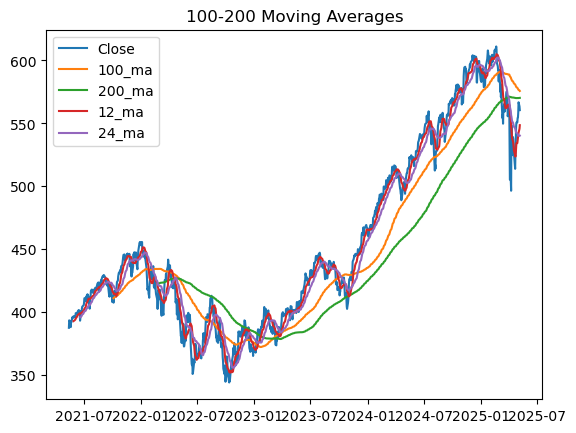

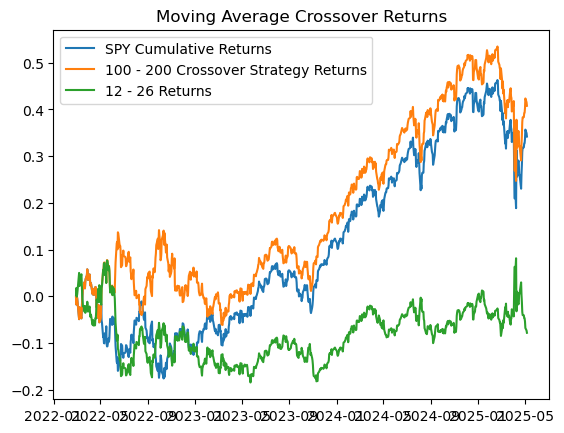

In [81]:
TICKER = 'SPY'
FAST = 100
SLOW = 200
LOOKBACK = 1000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].rolling(slow).mean()
    df[f'12_ma'] = df['Close'].rolling(12).mean()
    df[f'26_ma'] = df['Close'].rolling(26).mean()

    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
    plt.plot(df[f'12_ma'])
    plt.plot(df[f'26_ma'])
    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma', f'12_ma', f'24_ma'])
    plt.title(f'{FAST}-{SLOW} Moving Averages');
    return df.dropna()

def add_strategy(df, fast, slow):
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy_12-26'] = np.where(df[f'12_ma'] > df[f'26_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    df['Strategy_12-26'] = df['Strategy_12-26'].shift(1)
    return df

def test_strategy(df, ticker, fast, slow):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1
    df['Strategy_12-26_Returns'] = (1 + df['Close'].pct_change() * df['Strategy_12-26']).cumprod() -1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.plot(df['Strategy_12-26_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', f'{fast} - {slow} Crossover Strategy Returns', f'12 - 26 Returns'])
    plt.title(f'Moving Average Crossover Returns'); 

    return df.dropna()

def main():
    df = get_data()
    df = add_moving_averages(df, FAST, SLOW)
    df = add_strategy(df, FAST, SLOW)
    df = test_strategy(df, TICKER, FAST, SLOW)

    return df

main()

From the above graphs, I observed that having a longer fast and slow moving average period may create better results. With a lookback period of 1000 days, it appears that our strategy using a 100 fast period and a 200 slow period performed better than the historical return of the S&P 500 (as reflected by SPY). However, as I adjust the lookback period to be greater, the performance of this strategy significantly worsens. 

### Section 4: Adding a Technical Indicator
We will now add an additional technical indicator known as the Moving Average Convergence/Divergence (MACD). Developed in the 1970s by Gerald Appel, the MACD line is calculated by subtracting the 26-period exponential moving average from the 12-period exponential moving average. We should also include a 9-day exponential moving average of the MACD line. This is known as the signal line. We create a strategy based on the following:
* When the fast line crosses above the MACD line -> Long
* When the fast line crosses below the MACD line -> Short

This creates a variation of the basic swing trading strategy we implemented above. 

[*********************100%***********************]  1 of 1 completed


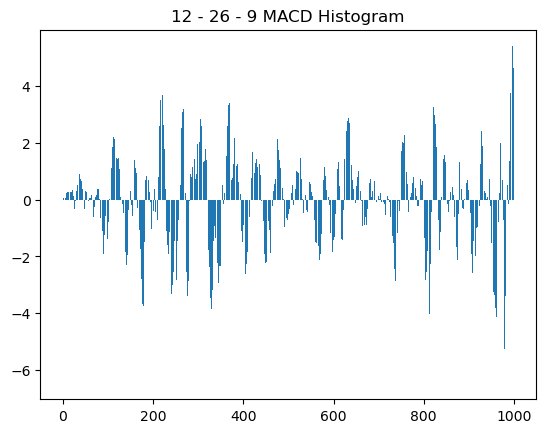

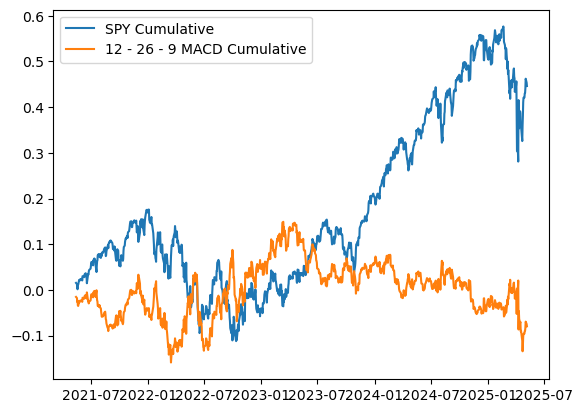

In [85]:
TICKER = 'SPY'
MACD_FAST = 12
MACD_SLOW = 26
MACD_SPAN = 9
LOOKBACK = 1000

def get_data_mac(ticker=TICKER):
    df = yf.download(ticker)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_MACD(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):

    df[f'{fast}_ema'] = df['Close'].ewm(span=fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span=slow).mean()

    df[f'MACD'] = df[f'{fast}_ema'] - df[f'{slow}_ema']

    df['Signal'] = df['MACD'].ewm(span=span).mean()

    df['MACD_hist'] = df['MACD'] - df['Signal']

    # plot the histogram
    plt.bar(x=range(len(df)), height=df['MACD_hist'])
    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Histogram')

    return df

def add_strategy_mac(df):

    df['Strategy'] = 0
    df['Strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy_mac(df):

    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative', f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Cumulative'])

    return df

def main():
    df = get_data_mac()
    df = add_MACD(df)
    df = add_strategy_mac(df)
    df = test_strategy_mac(df)

    return df

df = main()



For a moving average period of 12 and 26 days, our MACD strategy performed slightly better than our basic swing trading strategy in turns of cumulative returns (comparing the two graphs). There were also periods where our strategy created a higher cumulative returns than the S&P 500. 

### Conclusion
In conclusion, swing trading is an interesting trading strategy to implement that can be optimized to perform well in shorter periods of trading by adjusting different moving average periods. However, swing trading strategies typically lack performance in the long run, as there will be more periods of strong trends (bullish or bearish) and also periods of low volatility. Further implementation and testing can be done using additional technical indicators, such as RSI and MFI. 

### Reference 
[1]B. Dolan, “What Is MACD?,” Investopedia, Sep. 16, 2024. https://www.investopedia.com/terms/m/macd.asp

[2]J. Kirsch, “What Is Swing Trading And Is It Profitable?,” Forbes, Mar. 30, 2025. https://www.forbes.com/sites/investor-hub/article/what-is-swing-trading-is-it-profitable/ (accessed May 06, 2025).

[3]SharpeEducation, “GitHub - n84d/SharpEducation: A repository for educational contant on the Sharp Research channel,” GitHub, 2025. https://github.com/n84d/SharpEducation (accessed May 06, 2025).